# Robot Tool Segmentation using Branch Aggregation Attention Network

## Intoduction

Project for Machine Learning: Deep Learning.

In [1]:
# libraries
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tfs
import torchvision.transforms.functional as F
import numpy as np
from PIL import Image
import os
import json
import random
import matplotlib.pyplot as plt
#from tqdm import tqdm
from tqdm.notebook import tqdm # for notebooks
import EndovisDataloader

### Process Endovis 2018 Dataset

--Data Information--
Actual Image Size: (1280, 1024)
Reduced Image Size: (640, 512)
Training Set Size: 1639
Validation Set Size: 596
Test Set Size: 997


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0227826..2.992622].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0227826..3.0330505].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9294118..3.3969073].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7053221..3.3766928].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0227826..3.012836].


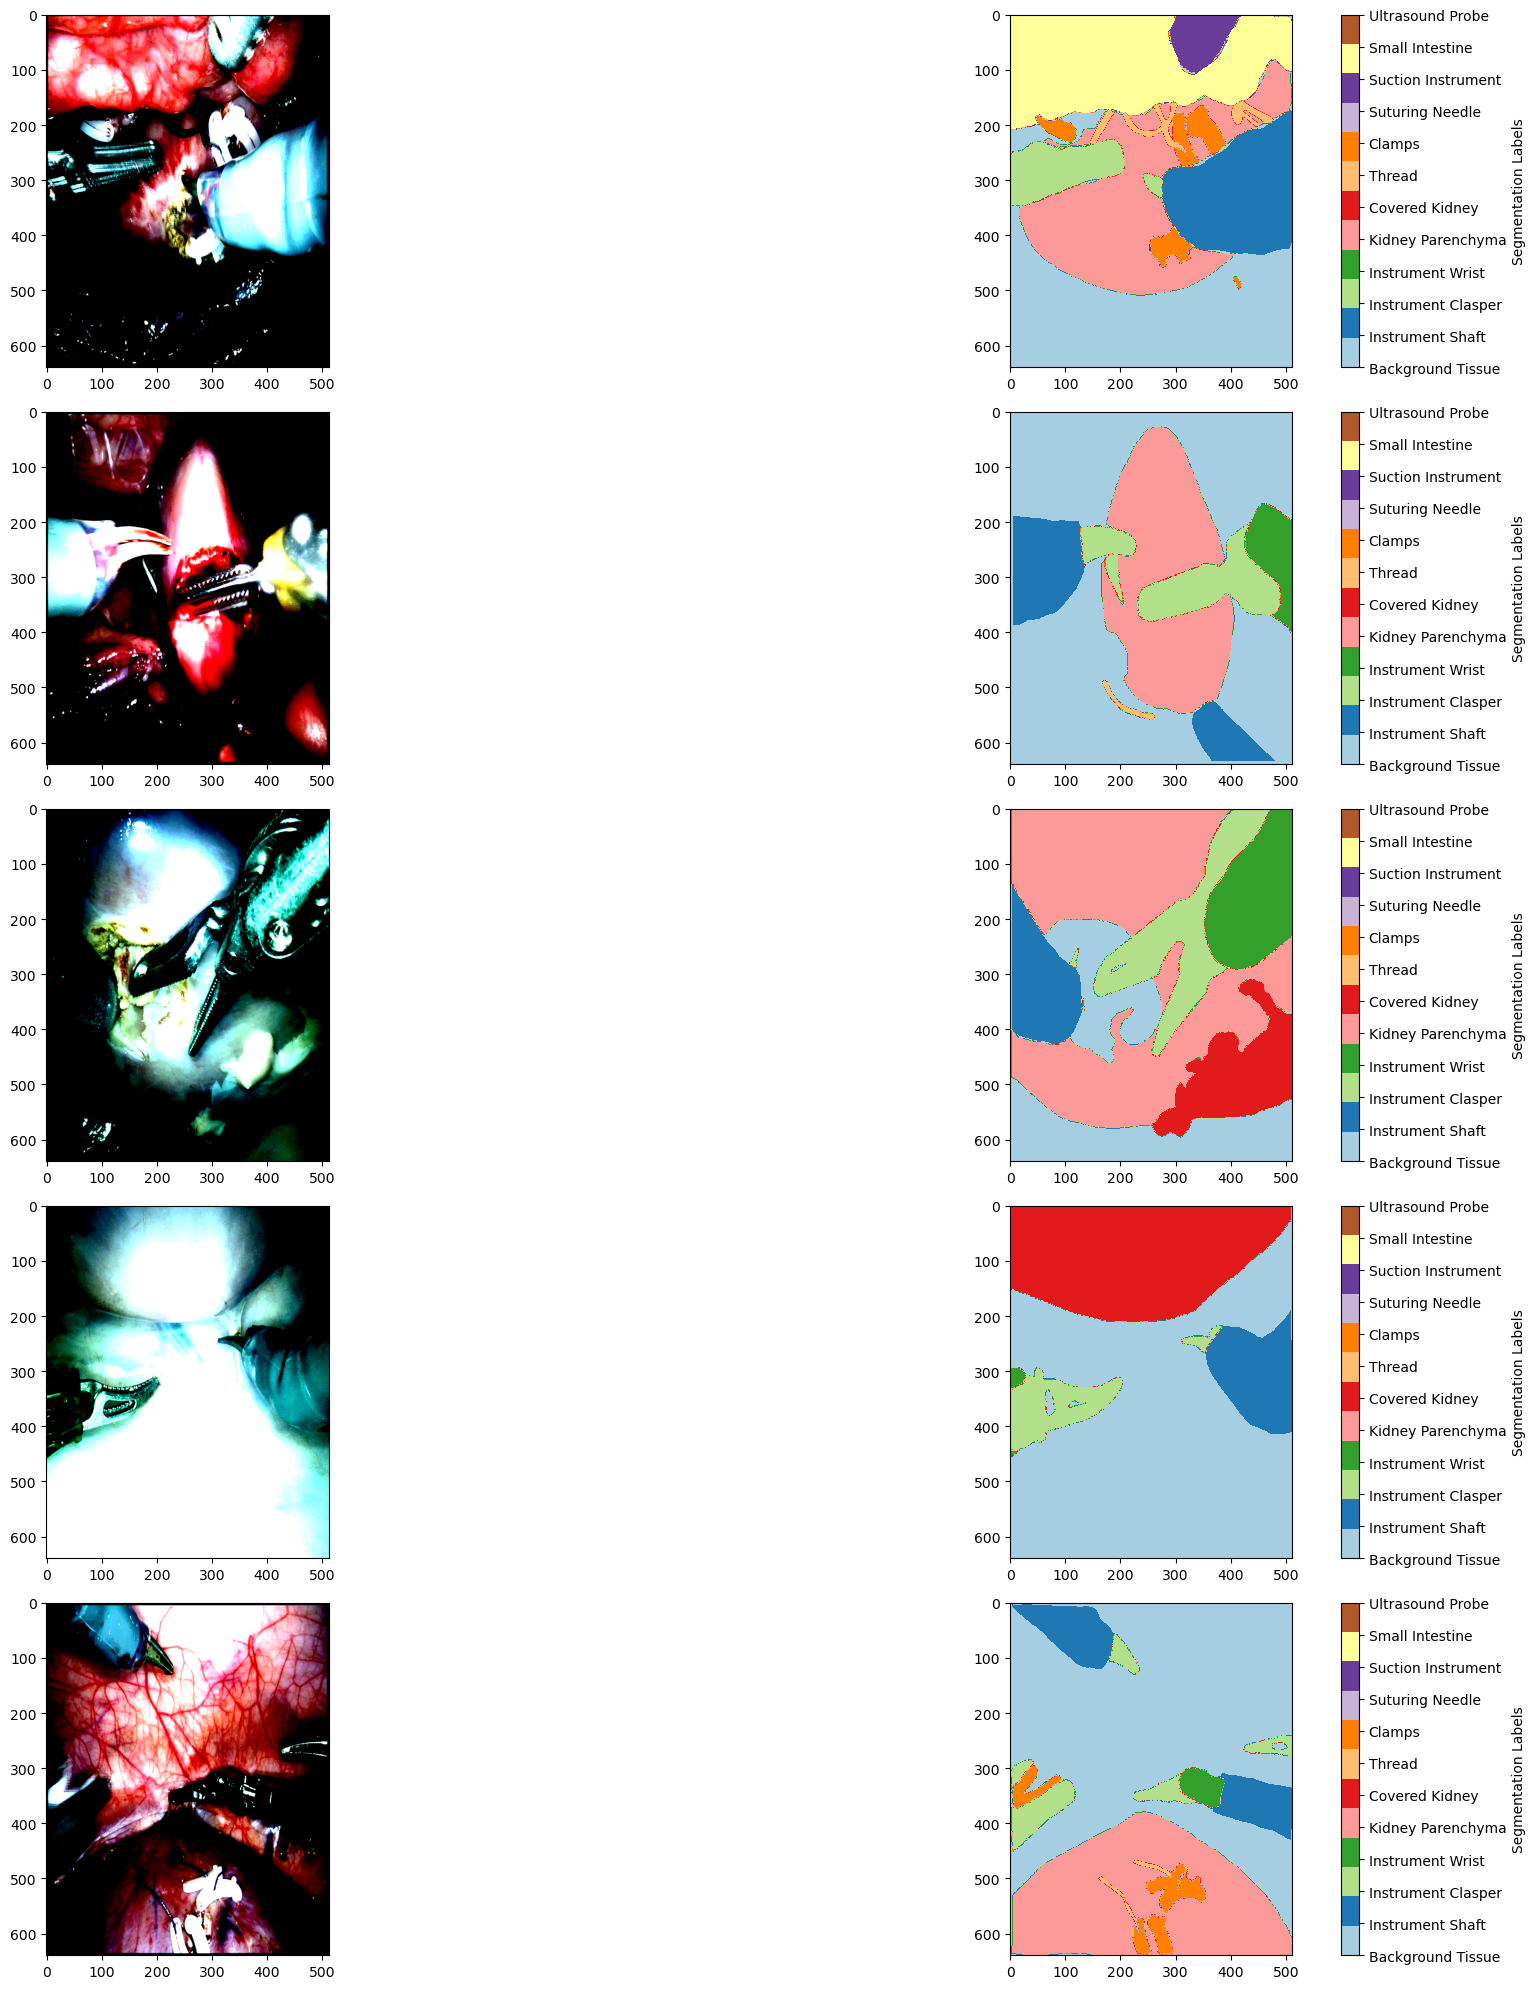

In [10]:
# get dataloaders and display test images
batch_size = 10
reduce_factor = 2 # how much to reduce image size by before training
num_workers = 0 # 0 for notebooks
train_dataloader, val_dataloader, test_dataloader = EndovisDataloader.getDataloaders(batch_size, reduce_factor, num_workers)

# make sure normalization is off first
# mean, std = calculate_mean_std(train_dataloader)
# print(f"Mean: {mean}, Std: {std}")

# visualize data 
images,labels = next(iter(train_dataloader))

n = 5
cmap = plt.get_cmap('Paired',12)
cbar_ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
cbar_labels = ["Background Tissue", "Instrument Shaft", "Instrument Clasper", "Instrument Wrist", "Kidney Parenchyma", "Covered Kidney", 
               "Thread", "Clamps", "Suturing Needle", "Suction Instrument", "Small Intestine", "Ultrasound Probe"]

fig, axes = plt.subplots(n, 2, figsize=(20, 20))
for i in range(n):  # Flatten the 2D array of axes
    axes[i,0].imshow(images[i].permute(1, 2, 0))  # Display the image in grayscale
    #axes[i,1].imshow(labels[i].permute(1, 2, 0))
    im = axes[i,1].imshow(labels[i], cmap = cmap, vmin = 0, vmax = 11)
    # colorbar settings
    cbar = fig.colorbar(im, ax=axes[i, 1], fraction=0.046, pad=0.04)
    cbar.set_label("Segmentation Labels", fontsize=10)
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_labels)

plt.tight_layout()
plt.show()